In [2]:
import matplotlib.pyplot as plt
from algorithms import greedy_algorithm, greddy_alternative, dynamic_programming
from aux import create_bribes, create_products, measure_time
from functools import reduce


In [3]:
def stress_test(initial_qty, initial_packs, initial_types, max_iterations, multiplier):
    qty = initial_qty
    packages = initial_packs
    prod_types = initial_types

    iteration = 0
    
    t_qty = []
    t_pack = []
    t_types = []
    n_qty = []
    n_pack = []
    n_type = []
    opt_pack = []
    opt_qty = []
    to_bribe_qty = []
    to_bribe_pack = []
    
    while iteration < max_iterations:
        # fixed product type to 1 and package quantity
        n_qty.append(qty)
        products = create_products(initial_types, qty, initial_packs)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming, products, asked_bribe)
        
        t_qty.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_qty.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_qty.append((tot_greed, tot_greed_alt, tot_dynam))
        
        qty *= multiplier
        
        # fixed product type to 1 and qty per package
        n_pack.append(packages)
        products = create_products(initial_types, initial_qty, packages)
        asked_bribe = create_bribes(products)
        brb_greed, time_greed = measure_time(greedy_algorithm, products, asked_bribe)
        brb_greed_alt, time_greed_alt = measure_time(greddy_alternative, products, asked_bribe)
        brb_dynam, time_dynam = measure_time(dynamic_programming, products, asked_bribe)
        
        t_pack.append((time_greed, time_greed_alt, time_dynam))
        to_bribe_pack.append(asked_bribe[0].qty)
        tot_greed = reduce(lambda acum, prod: acum + prod.qty, brb_greed[1], 0)
        tot_greed_alt = reduce(lambda acum, prod: acum + prod.qty, brb_greed_alt[1], 0)
        tot_dynam = reduce(lambda acum, prod: acum + prod.qty, brb_dynam[1], 0)
        opt_pack.append((tot_greed, tot_greed_alt, tot_dynam))
        
        
        packages *= multiplier
        
        iteration += 1
        
    plt.figure(figsize=(10,8))
    plt.plot(n_qty, t_qty, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion qty unidades por paquete")
    plt.xlabel("Unidades por paquete")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,8))
    plt.plot(n_pack, t_pack, label=['greedy', 'greedy_alt', 'dynamic'])
    plt.title(f"Tiempo en funcion variacion cantidad de paquetes")
    plt.xlabel("Paquetes totales")
    plt.ylabel("Duración en Segundos")
    plt.legend()
    plt.show()
    return to_bribe_pack,opt_pack, to_bribe_qty, opt_qty        

    


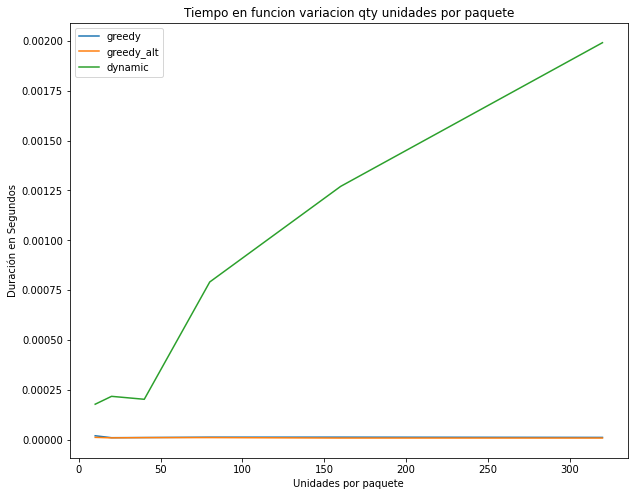

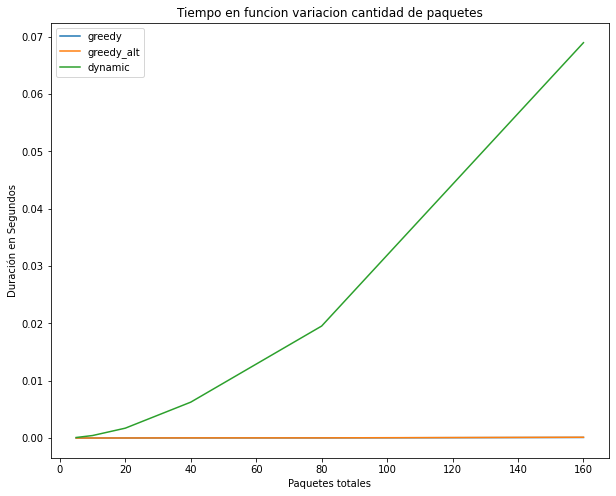

([10, 9, 23, 72, 229, 144],
 [(14, 10, 10),
  (10, 9, 9),
  (27, 23, 23),
  (73, 72, 72),
  (229, 229, 229),
  (148, 144, 144)],
 [25, 31, 25, 83, 316, 499],
 [(27, 25, 25),
  (37, 33, 31),
  (29, 29, 29),
  (114, 87, 87),
  (333, 333, 333),
  (543, 543, 543)])

In [5]:
stress_test(10, 5, 1, 6, 2)